In [ ]:
# turn off warning
options(warn=-1)

In [ ]:
# install packages
install.packages("quantmod")
install.packages("nimble")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# load packages
require("quantmod")
require("nimble")

Loading required package: nimble



Consider the monthly log stock returns, in percentages and including dividends, of Merck & Company, Johnson & Johnson, General Electric, General Motors, Ford Motor Company, Expedia, and Booking.com from January 2016 to December 2019. 

In [ ]:
# create a base dataset for the analysis
getSymbols("MRK", from = "2016-01-01", to = "2019-12-31", src = "yahoo") # merck & company
getSymbols("JNJ", from = "2016-01-01", to = "2019-12-31", src = "yahoo") # johnson & johnson
getSymbols("GE", from = "2016-01-01", to = "2019-12-31", src = "yahoo") # general electric
getSymbols("GM", from = "2016-01-01", to = "2019-12-31", src = "yahoo") # general motors
getSymbols("F", from = "2016-01-01", to = "2019-12-31", src = "yahoo") # ford motor company
getSymbols("EXPE", from = "2016-01-01", to = "2019-12-31", src = "yahoo") # expedia
getSymbols("BKNG", from = "2016-01-01", to = "2019-12-31", src = "yahoo") # booking.com

[1] "MRK"

[1] "JNJ"

[1] "GE"

[1] "GM"

[1] "F"

[1] "EXPE"

[1] "BKNG"

In [ ]:
# log stock returns
MRK.logret = monthlyReturn(MRK, type = "log")
JNJ.logret = monthlyReturn(JNJ, type = "log")
GE.logret = monthlyReturn(GE, type = "log")
GM.logret = monthlyReturn(GM, type = "log")
F.logret = monthlyReturn(F, type = "log")
EXPE.logret = monthlyReturn(EXPE, type = "log")
BKNG.logret = monthlyReturn(BKNG, type = "log")

dataset = as.data.frame(cbind(MRK.logret, JNJ.logret, GE.logret, GM.logret,
                              F.logret, EXPE.logret, BKNG.logret))
colnames(dataset) <- c("MRK Monthly Log Return", "JNJ Monthly Log Return",
                       "GE Monthly Log Return", "GM Monthly Log Return",
                       "F Monthly Log Return", "EXPE Monthly Log Return",
                       "BKNG Monthly Log Return")

Perform a principal component analysis of the data using the sample covariance matrix.

In [ ]:
pca = prcomp(dataset)
pca
summary(pca)

Standard deviations (1, .., p=7):
[1] 0.11753574 0.08627297 0.07027345 0.04982751 0.04569922 0.03888509 0.03444126

Rotation (n x k) = (7 x 7):
                               PC1         PC2         PC3         PC4
MRK Monthly Log Return  0.07750569 -0.09671228  0.23394456 -0.36920077
JNJ Monthly Log Return  0.10033033 -0.04621595 -0.07520642  0.02599518
GE Monthly Log Return   0.50616930  0.78598801  0.31356466  0.15920871
GM Monthly Log Return   0.46044329 -0.06541500 -0.42040873 -0.45190243
F Monthly Log Return    0.37539632  0.03667266 -0.59851333 -0.03213658
EXPE Monthly Log Return 0.51322702 -0.48766468  0.54558965 -0.18098565
BKNG Monthly Log Return 0.33374681 -0.35678120 -0.09306643  0.77437927
                                 PC5         PC6         PC7
MRK Monthly Log Return   0.614737300 -0.50948219 -0.39512819
JNJ Monthly Log Return   0.668409578  0.24202315  0.69001419
GE Monthly Log Return    0.008291643 -0.04527036  0.01507031
GM Monthly Log Return   -0.309891095 -0.4288

Importance of components:
                          PC1     PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     0.1175 0.08627 0.07027 0.04983 0.04570 0.03889 0.03444
Proportion of Variance 0.4128 0.22241 0.14757 0.07419 0.06241 0.04518 0.03545
Cumulative Proportion  0.4128 0.63521 0.78278 0.85697 0.91937 0.96455 1.00000

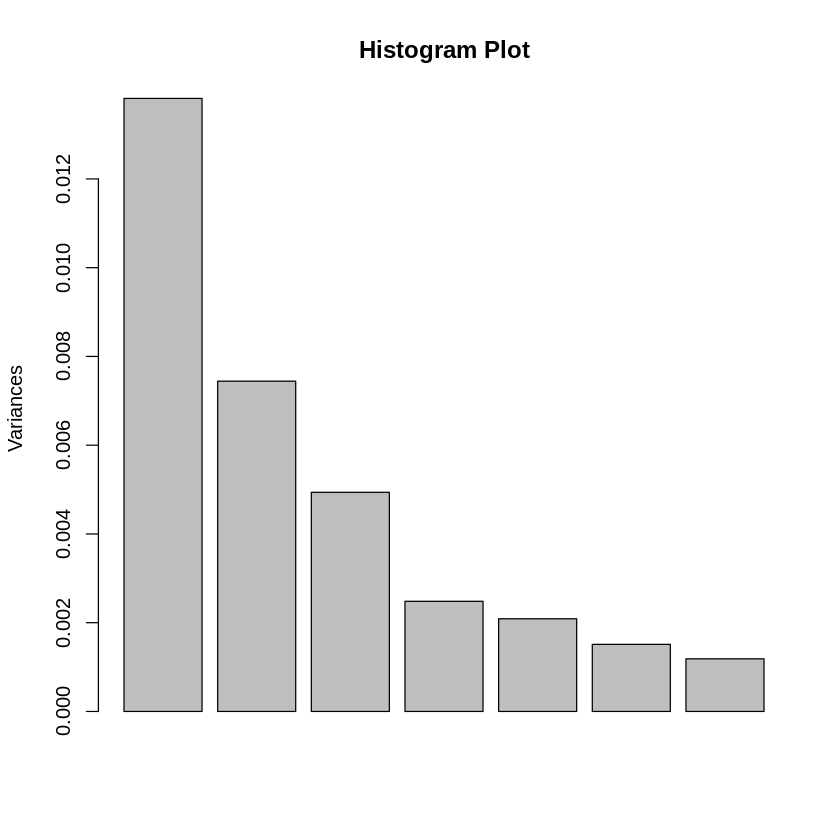

In [ ]:
plot(pca, main = "Histogram Plot")

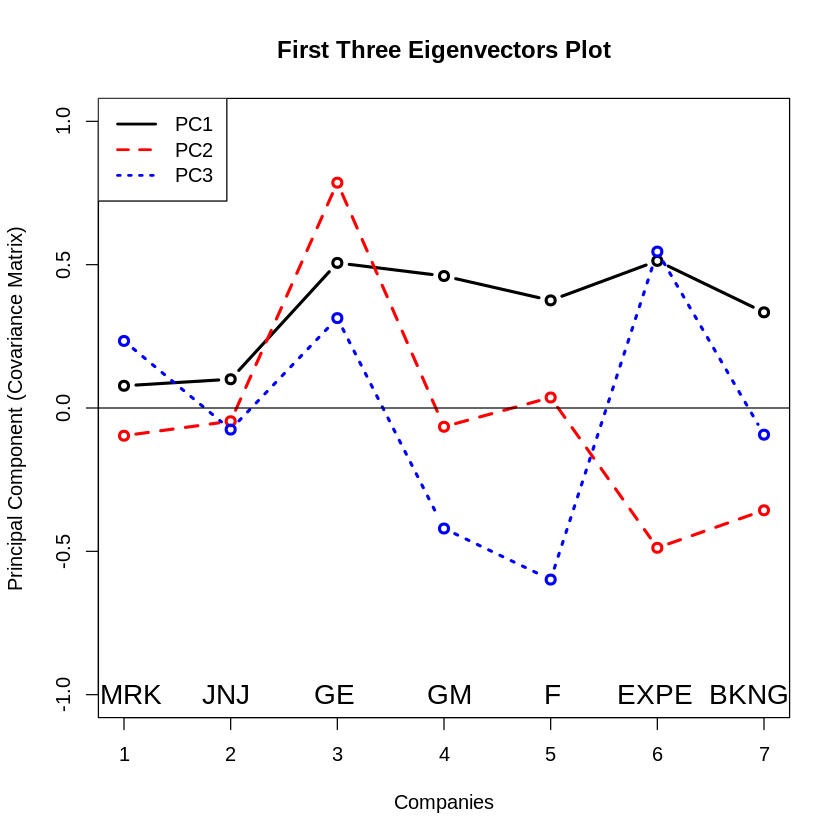

In [ ]:
# plot
plot(pca$rotation[, 1], type = "b", xlab = "Companies",
     ylab = "Principal Component (Covariance Matrix)",
     main = "First Three Eigenvectors Plot", lwd = 2.5, ylim = c(-1, 1))
lines(pca$rotation[, 2], type="b", lty = 2, lwd = 2.5, col = "red")
lines(pca$rotation[, 3], type="b", lty = 3, lwd = 2.5, col = "blue")
abline(h = 0)

# legends
legend("topleft", c("PC1", "PC2", "PC3"), lty = c(1, 2, 3), lwd = 2.2,
       col = c("black", "red", "blue"))
text(4, -1, "  MRK     JNJ        GE         GM         F       EXPE  BKNG  ",
     cex = 1.4)

The first eigenvector has all positive values meaning that the log-returns are either positive or negative for all of the stock prices. The second eigenvector shows that General Electric and Ford move in a positive trend where the other company is negative in log returns. There is a big spike in the General Electric principal component in the second eigenvector, meaning it might affect the variation in PC2. The third eigenvector is more random since some of the companies are in a positive trend and some in a negative trend. Ford and Expedia seem to have a bigger principal component (in a different direction) than the rest of the companies, meaning they might significantly affect the variability in PC3. Note that the analysis using three principal components only yields 0.78 variances, and it might require more principal components to analyze the data correctly and explain most of the variations since these companies specialize in different industries. 

Perform a principal component analysis of the data using the sample correlation matrix.

In [ ]:
pca_scale = prcomp(dataset, scale = TRUE)
pca_scale
summary(pca_scale)

Standard deviations (1, .., p=7):
[1] 1.6004420 1.1010030 0.9776239 0.9606248 0.7967268 0.6505222 0.5384019

Rotation (n x k) = (7 x 7):
                              PC1        PC2         PC3         PC4        PC5
MRK Monthly Log Return  0.1562376 -0.7101678  0.37916791  0.13923555 -0.4372209
JNJ Monthly Log Return  0.2730332 -0.2178746  0.32183281 -0.78304328  0.3115133
GE Monthly Log Return   0.2780537  0.2715365  0.63028975  0.43311979  0.4793793
GM Monthly Log Return   0.4983746  0.2426173 -0.02875730  0.10468916 -0.4500485
F Monthly Log Return    0.4617426  0.3947275  0.05857125 -0.22429967 -0.3504540
EXPE Monthly Log Return 0.4202183 -0.3848815 -0.24369652  0.34112232  0.2364802
BKNG Monthly Log Return 0.4307690 -0.1079518 -0.54013387 -0.04721574  0.3173457
                               PC6          PC7
MRK Monthly Log Return   0.3418196 -0.009693898
JNJ Monthly Log Return  -0.2205720 -0.124730894
GE Monthly Log Return    0.1727544 -0.066690576
GM Monthly Log Return   -0.3274

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.6004 1.1010 0.9776 0.9606 0.79673 0.65052 0.53840
Proportion of Variance 0.3659 0.1732 0.1365 0.1318 0.09068 0.06045 0.04141
Cumulative Proportion  0.3659 0.5391 0.6756 0.8075 0.89813 0.95859 1.00000

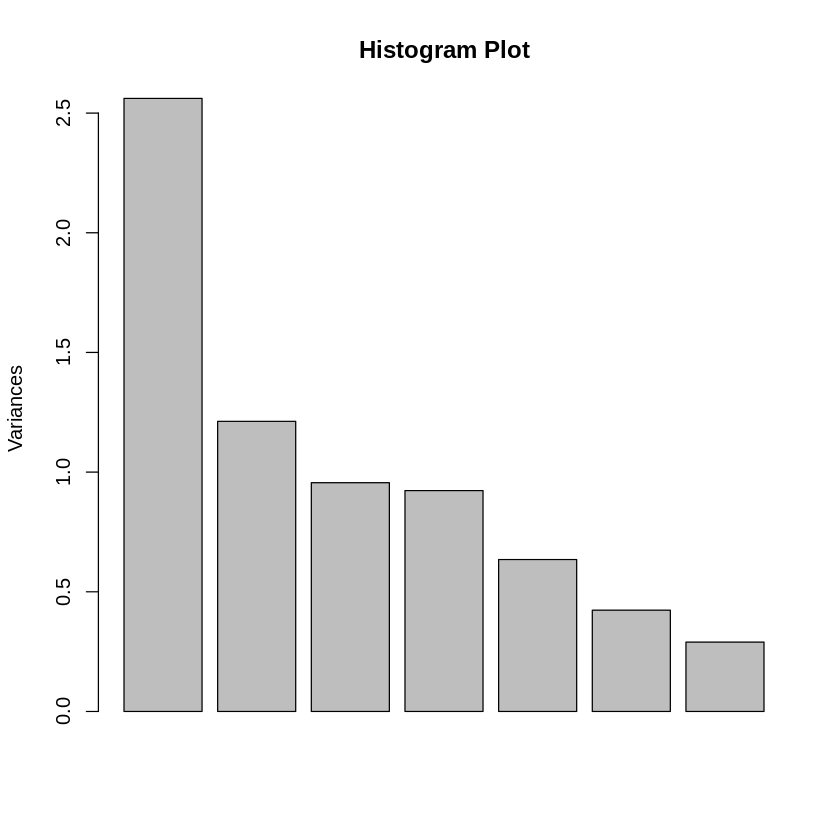

In [ ]:
plot(pca_scale, main = "Histogram Plot")

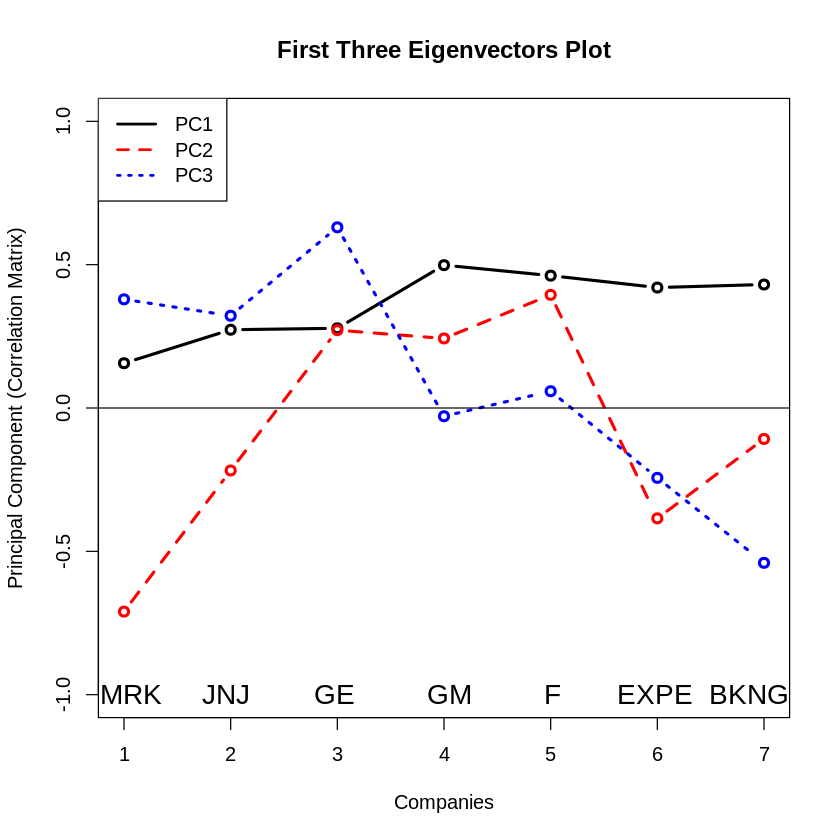

In [ ]:
# plot
plot(pca_scale$rotation[, 1], type = "b", xlab = "Companies",
     ylab = "Principal Component (Correlation Matrix)",
     main = "First Three Eigenvectors Plot", lwd = 2.5, ylim = c(-1, 1))
lines(pca_scale$rotation[, 2], type="b", lty = 2, lwd = 2.5, col = "red")
lines(pca_scale$rotation[, 3], type="b", lty = 3, lwd = 2.5, col = "blue")
abline(h = 0)

# legends
legend("topleft", c("PC1", "PC2", "PC3"), lty = c(1, 2, 3), lwd = 2.2,
       col = c("black", "red", "blue"))
text(4, -1, "  MRK     JNJ        GE         GM         F       EXPE  BKNG  ",
     cex = 1.4)

The first eigenvector has all positive values meaning that the log-returns are either positive or negative for all of the stock prices. The second eigenvector shows that it is strongly correlated to MRK. The significant change in variable correlation suggests that General Electric strongly affected the variance of PC2 in the covariance matrix. The third eigenvector shows apparent changes, where General Electric and Booking.com strongly control the correlation (moving in a different direction). The significant change in variable correlation suggests that Ford and Expedia strongly affected the variance of PC2 in the covariance matrix.

Perform a statistical factor analysis on the data and identify the number of common factors, and interpret the common factors.

In [ ]:
fa_none = factanal(dataset, 3, rotation = "none")
print(fa_none, cutoff = 0.1)


Call:
factanal(x = dataset, factors = 3, rotation = "none")

Uniquenesses:
 MRK Monthly Log Return  JNJ Monthly Log Return   GE Monthly Log Return 
                  0.831                   0.897                   0.850 
  GM Monthly Log Return    F Monthly Log Return EXPE Monthly Log Return 
                  0.466                   0.043                   0.271 
BKNG Monthly Log Return 
                  0.005 

Loadings:
                        Factor1 Factor2 Factor3
MRK Monthly Log Return                   0.402 
JNJ Monthly Log Return   0.224   0.215         
GE Monthly Log Return            0.306   0.220 
GM Monthly Log Return    0.423   0.531   0.271 
F Monthly Log Return     0.418   0.884         
EXPE Monthly Log Return  0.516           0.681 
BKNG Monthly Log Return  0.996                 

               Factor1 Factor2 Factor3
SS loadings      1.675   1.210   0.754
Proportion Var   0.239   0.173   0.108
Cumulative Var   0.239   0.412   0.520

Test of the hypothesis that 3

The first factor seems to affect JNJ, GM, F, EXPE, and BKNG. From the yahoo source, these companies are in the consumer cyclical sector, meaning that the first factor can be depicted as a cyclical consumer factor. The second factor seems to affect JNJ, GE, GM, and F. From the yahoo source, these companies are manufacturers industry, meaning that the second factor can be depicted as an auto manufacturers factor because a huge value of the factor is in GM (0.531) and F (0.884). The third factor is in a sporadic pattern, meaning it is more spread out in different sectors so it is hard to interpret.

Consider an R program that takes an array denoting the daily stock price, and returns the maxmum profit that could be made by buying and then selling one share of that stock.  There is no need to buy if no profit is possible. 

In [ ]:
buy_and_sell_stock_once = function(prices) { 
    min_price_so_far = Inf
    max_profit = 0 
    trace = data.frame(price = NA, min_price_so_far = min_price_so_far, max_profit_sell_today = NA, max_profit = NA)
    for (price in prices) {
        max_profit_sell_today = price - min_price_so_far
        max_profit = max(max_profit_sell_today, max_profit)
        min_price_so_far = min(price, min_price_so_far)
        trace = rbind(trace, c(price, min_price_so_far, max_profit_sell_today, max_profit))
    }
    return(list(max_profit = max_profit, trace = trace))
}

You can use the following R codes snippets to check your results.

In [ ]:
getSymbols("TSLA")
result = buy_and_sell_stock_once(TSLA$TSLA.Adjusted['2020-08-01/2020-08-14'])

[1] "TSLA"

In [ ]:
backtesting_trace = xts(result$trace[-c(1,2),],order.by = index(TSLA$TSLA.Adjusted['2020-08-01/2020-08-13']))
backtesting_trace

             price min_price_so_far max_profit_sell_today max_profit
2020-08-03 297.400          297.000              0.399994   0.399994
2020-08-04 297.004          297.000              0.003998   0.399994
2020-08-05 297.916          297.000              0.915985   0.915985
2020-08-06 290.542          290.542             -6.458008   0.915985
2020-08-07 283.714          283.714             -6.828003   0.915985
2020-08-10 274.878          274.878             -8.835998   0.915985
2020-08-11 310.952          274.878             36.074005  36.074005
2020-08-12 324.200          274.878             49.322021  49.322021
2020-08-13 330.142          274.878             55.264007  55.264007

### Explain the algorithm written above, and make an argument that the algorithm is correct. 

First, we declare the min_price_so_far as Infinity and max_profit as 0. It is correct because, for min_price_so_far, we want to make the value as high as possible so it would get overwritten in the first case with the first price value (using the min function). The max_profit is 0 because it is the starting point where no transaction is made. The trace variable is used to create a data frame so we can visualize the data in a simple structure. 

Then we calculate every adjusted price of the given daily stock price by first calculating the max profit_sell_today. The algorithm has a correct behavior since the profit of that day if we were to sell the stock, it is the price for that day (price) minus the lowest owned price stock (min_price_so_far). Note that it also works on the first case because it will record the max_profit_sell_today to be minus infinity and max_profit to be 0. It is the correct behavior because if we were to buy and sell on the same day, we would get 0 profit (it is comparing -Infinity and 0 with the max function). 

Using the max function, we can get the maximum profit by comparing the prices each day. It will always record the highest profit within the time period, and we will be able to sell it at the highest price.

Note that we also keep track of the minimum/lowest price of the stocks (min_price_so_far) by comparing the price of that day with the current one by using the min function. It helps to ensure the highest profit possible by buying the lowest stock price. The algorithm also records and updates the data in each iteration to the data frame by using the rbind function.

Computes the maximum profit that can be made by buying and selling a share at most twice.  The second buy must be made on another date after the first sale.  

In [ ]:
buy_and_sell_stock_twice = function(prices) { 
    min_price_so_far = Inf
    max_profit = 0

    ## Forward Phase : For each day, we record maximum profit if we sell on that day    
    first_buy_sell_profit = rep(0, length.out = length(prices))
    i = 1;    
    for(price in prices) {
        max_profit_sell_today = price - min_price_so_far
        max_profit = max(max_profit, max_profit_sell_today)
        min_price_so_far = min(price, min_price_so_far)
        first_buy_sell_profit[i] = max_profit 
        i = i + 1; 
    }

    ## Backward Phase : For each day, find the maximum profit if we make the
    ##                  second buy on that day
    max_total_profit = 0
    max_price_so_far =  0 # choose Inf, -Inf or 0; 
    reversed_prices =  rev(prices) # "reverse" the vector 'prices'
    i = length(prices) # length of the prices
    for(price in reversed_prices) {
        max_price_so_far = max(max_price_so_far, price)
        max_total_profit = max(max_total_profit, first_buy_sell_profit[i] + 
                               max_price_so_far - price) 
        i = i - 1; # decrement 
    }
    return(max_total_profit)
}

### Explain the algorithm written above, and make an argument that the algorithm is correct. 

Getting the maximum profit of buying/selling the share twice requires the best combination of buying and selling the stock at the right price with the condition that the second buy must be after the first sale.

On the first part of the algorithm, min_price_so_far is used to keep track of the lowest price of a share each day and update it accordingly. The max_profit is calculated if we were to sell the share on the same day. It is calculated by subtracting the current price that day with the min_price_so_far. If the profit calculated is bigger than the value in max_profit, it will update the variable to make sure it is the highest profit that is achievable. After we updated the max profit, it will be stored in the first_buy_sell_profit vector to keep track of the maximum profit achievable in the first round of buying and selling. 

On the second part of the algorithm, the max_price_so_far variable is used to keep track of the highest price starting from the last date. This is achievable by indicating the variable i to be the last index of the price vector and reversing the order. This is done to ensure the possible profit from two-time buy/sell with the existing first buy/sale profit on the same day. For every date from the last, we update the max_price_so_far to be the highest achievable profit. After calculating the highest profit of the second transaction, we calculate the max_total_profit by comparing the max_total_profit with the profit earned from the first and second transactions. max_price_so_far - price is the profit from the second transaction and first_buy_sell_profit(i) is the profit made from the first transaction, and it will ensure that the highest profit is obtained when it is compared by the algorithm max function. Lastly, the algorithm will return the max total profit in the max_total_profit variable.